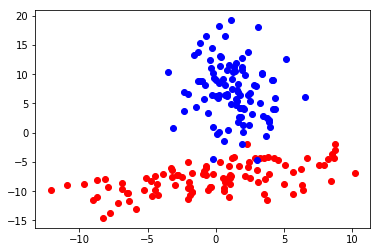

In [18]:
import csv
import numpy as np
import matplotlib.pyplot as plt

with open('archivos_practico2_2017/dataset2Pr2.csv', 'r') as f:
        data = [row for row in csv.reader(f.read().splitlines(),delimiter=',',quoting=csv.QUOTE_NONNUMERIC)]
X = []
Y = []
for lis in data:
   
    X.append([lis[0],lis[1]])
    Y.append(lis[2])
for x in data:
    r = x[2]
    if r == 1:
        plt.plot(x[0],x[1],'ob')  
    else:
        plt.plot(x[0],x[1],'or')
plt.savefig('reg.jpg')
plt.show()  

In [19]:

def sigmoid(scores):
    '''Sigmoid Function'''
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    '''Logarithmic Likelihood'''
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    '''Logistic regression implementation'''
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
    #weight initialization    
    weights = np.zeros(features.shape[1])
    
    for step in xrange(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        # Implementation for gradient descent
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        
    return weights


In [20]:
X_train = []
y_train = []
X_test = []
y_test = []
for l in range(70):
    X_train.append([data[l][0],data[l][1]])
    y_train.append(data[l][2])
for l in range(100,170):
    X_train.append([data[l][0],data[l][1]])
    y_train.append(data[l][2])
    
for l in range(70,100):
   
    X_test.append([data[l][0],data[l][1]])
    y_test.append(data[l][2])
for l in range(170,200):
    X_test.append([data[l][0],data[l][1]])
    y_test.append(data[l][2])    

In [41]:

weights = logistic_regression(np.array(X_train), np.array(y_train),num_steps = 30000, learning_rate = 200e-5, add_intercept=True)


In [42]:
X_1 = np.hstack((np.ones((np.array(X_test).shape[0], 1)),X_test))
final_scores = np.dot(X_1, weights)
preds = np.round(sigmoid(final_scores))
print preds

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.
  1.  1.  1.  1.  1.  1.]


In [43]:
print 'Accuracy from scratch: {0}'.format((preds == y_test).sum().astype(float) / len(preds))

Accuracy from scratch: 0.983333333333


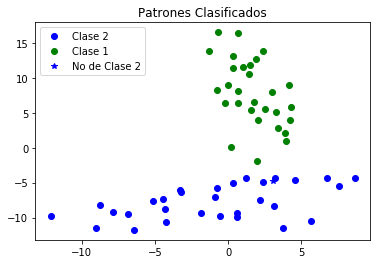

In [63]:
import matplotlib.lines as mlines
first = True
first2 = True
for label,data,true in zip(preds,X_test,y_test):
    if label == 1 and true == 1 :
        if first:
            plt.plot(data[0],data[1],'og', label = 'Clase 1')
            first = False
        else:
            plt.plot(data[0],data[1],'og')
    else:
        if label == 1:
            plt.plot(data[0],data[1],'*g')  
    if label == 0 and true == 0:    
        if first2:
            plt.plot(data[0],data[1],'ob', label = 'Clase 2')
            first2 = False
        else:    
            plt.plot(data[0],data[1],'ob')
    else:
        if label == 0:
            plt.plot(data[0],data[1],'*b', label = 'No de Clase 2')
plt.title('Patrones Clasificados')
plt.legend(loc= 'upper left')
plt.savefig('reg_pred_tt.jpg')
plt.show()  
    